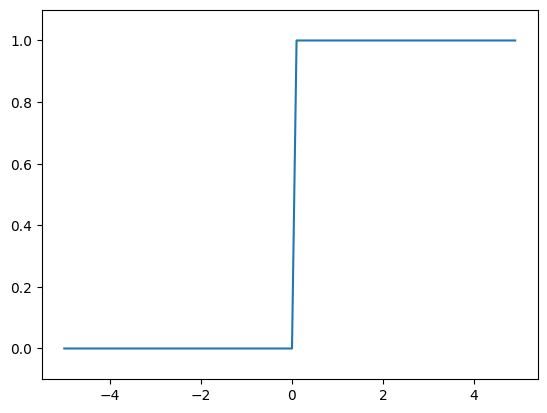

In [21]:
import numpy as np
import matplotlib.pylab as plt

def step(x):
    """계단 함수
    """
    return 1 if x > 0 else 0

assert(step(1.0) == 1)
assert(step(0.5) == 1)
assert(step(0.0) == 0)
assert(step(-0.5) == 0)

def step(x: np.array) -> np.array:
    """numpy를 사용하는 계단 함수
    """
    # y = x > 0
    # return y.astype(int)
    return np.array(x > 0, dtype=int)

assert(np.allclose(
    step(np.array([-1, -0.5, 0, 0.5, 1])),
    np.array([0, 0, 0, 1, 1])
))

"""
스텝 함수 그리기
"""
X = np.arange(-5.0, 5.0, 0.1)
Y = step(X)
plt.plot(X,Y)
plt.ylim(-0.1, 1.1)  # y축 범위 설정
plt.show()


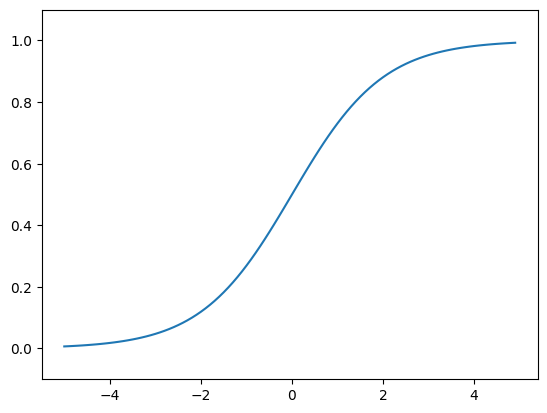

In [22]:
def sigmoid(x):
    """시그모이드 함수
    """
    return 1 / (1 + np.exp(-x))

assert(np.allclose(
  sigmoid(np.array([-1.0, 1.0, 2.0])), 
  np.array([0.26894142, 0.73105858, 0.88079708])
))

"""
시그모이드 함수 그리기
"""
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X,Y)
plt.ylim(-0.1, 1.1)  # y축 범위 설정
plt.show()


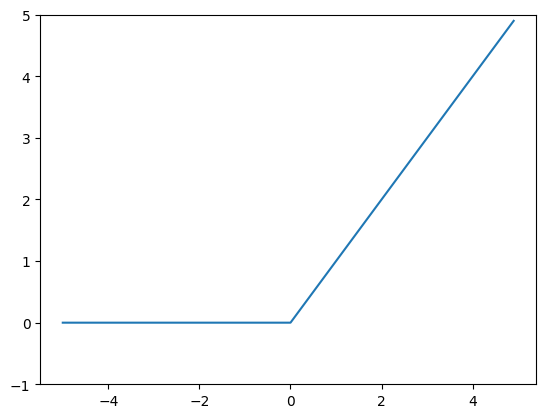

In [23]:
def relu(x):
    """ReLU 함수: Rectified Linear Unit
    """
    return np.maximum(0, x)

assert(np.allclose(
  relu(np.array([-1.0, -0.5, 0.0, 0.5, 1.0])),
  np.array([0, 0, 0, 0.5, 1.0])
))

"""
ReLU 함수 그리기
"""
X = np.arange(-5.0, 5.0, 0.1)
Y = relu(X)
plt.plot(X,Y)
plt.ylim(-1.0, 5.0)  # y축 범위 설정
plt.show()

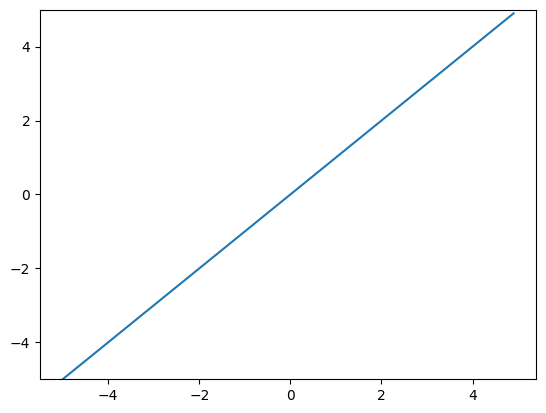

In [24]:
def indentity_function(x):
    """항등함수
    """
    return x

"""
항등 함수 그리기
"""
X = np.arange(-5.0, 5.0, 0.1)
Y = indentity_function(X)
plt.plot(X,Y)
plt.ylim(-5, 5)  # y축 범위 설정
plt.show()

In [25]:
"""
행렬의 내적
"""

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

assert(np.allclose(A*B, np.array([[5,12], [21, 32]])))
assert(np.allclose(B*A, np.array([[5,12], [21, 32]])))
assert(np.allclose(np.dot(A, B), np.array([[19, 22], [43, 50]])))
assert(np.allclose(np.dot(B, A), np.array([[23, 34], [31, 46]])))

# A*B: 행렬 각 원소를 그대로 곱함
print(f"A * B =\n {A*B}\n")
print(f"B * A =\n {B*A}\n")

# np.dot(A, B): 행렬 내적 (행렬 곱)
print(f"A dot B =\n {np.dot(A, B)}\n")
print(f"B dot A =\n {np.dot(B, A)}\n")

A * B =
 [[ 5 12]
 [21 32]]

B * A =
 [[ 5 12]
 [21 32]]

A dot B =
 [[19 22]
 [43 50]]

B dot A =
 [[23 34]
 [31 46]]



In [26]:
"""
bias값을 행렬에 넣어서 내적으로 퍼셉트론 계산
"""
one = 1.0
bias = 0.25
X = np.array([one, 0.5, 1.0])
W = np.array([
  [bias, bias, bias],
  [0.5, 0.25, 0.25],
  [0.1, 0.25, 1.0]
])
A = np.dot(X,W)
print(A)

"""
bias값을 행렬에 넣지 않고 더해서 퍼셉트론 계산
"""
X = np.array([0.5, 1.0])
W = np.array([
    [0.5, 0.25, 0.25],
    [0.1, 0.25, 1.0]
])
B = np.array([bias, bias, bias])
A = np.dot(X,W) + B
print(A)

[0.6   0.625 1.375]
[0.6   0.625 1.375]


In [27]:
X = np.array([0.5, 1.0])
W = np.array([
    [0.5, 0.25, 0.25],
    [0.1, 0.25, 1.0]
])
B = np.array([bias, bias, bias])
A = np.dot(X,W) + B
print(A)

# bias와 weight로 계산된 값을 활성화 함수로 시그모이드 함수를 사용하여 결과 값 얻기.
Z = sigmoid(A)
print(Z)

[0.6   0.625 1.375]
[0.64565631 0.65135486 0.79818678]


In [28]:
def forward(X):
  """순전파 신경망 예
  """
  W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  B1 = np.array([0.1, 0.2 ,0.3])
  A1 = np.dot(X, W1) + B1
  Z1 = sigmoid(A1)
  print(f"X: {X}")
  print(f"W1: {W1}")
  print(f"B1: {B1}")
  print(f"A1: {A1}")
  print(f"Z1: {Z1}\n")

  W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  B2 = np.array([0.1, 0.2])
  A2 = np.dot(Z1, W2) + B2
  Z2 = sigmoid(A2)
  print(f"W2: {W2}")
  print(f"B2: {B2}")
  print(f"A2: {A2}")
  print(f"Z2: {Z2}\n")

  W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
  B3 = np.array([0.1, 0.2])
  A3 = np.dot(Z2, W3) + B3
  Y = indentity_function(A3)
  print(f"W3: {W3}")
  print(f"B3: {B3}")
  print(f"A3: {A3}")
  print(f"Y: {Y}\n")

  return Y

assert(
  np.allclose(
    forward([1.0, 0.5]),
    np.array([0.31682708, 0.69627909])
  )
)

X: [1.0, 0.5]
W1: [[0.1 0.3 0.5]
 [0.2 0.4 0.6]]
B1: [0.1 0.2 0.3]
A1: [0.3 0.7 1.1]
Z1: [0.57444252 0.66818777 0.75026011]

W2: [[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]
B2: [0.1 0.2]
A2: [0.51615984 1.21402696]
Z2: [0.62624937 0.7710107 ]

W3: [[0.1 0.3]
 [0.2 0.4]]
B3: [0.1 0.2]
A3: [0.31682708 0.69627909]
Y: [0.31682708 0.69627909]



In [29]:
def softmax(x):
    """오버플로우 가능성이 있는 소프트맥스 함수.
    """
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x
A = np.array([0.3, 2.9, 4.0])
print(f"A = {A}")
print(f"softmax(A) = {softmax(A)}")

A = [0.3 2.9 4. ]
softmax(A) = [0.01821127 0.24519181 0.73659691]


In [30]:
# 지수 함수는 인자가 조금만 커져도 매우 큰 수가 나온다.
# np.exp()의 경우 inf 값을 리턴하고 경고가 나온다.
a = np.array([1, 10, 100, 1000])
exp_a = np.exp(a)
print(f"A = {A}")
print(f"exp(A) = {np.exp(a)}") # exp(1000) 은 inf 값을 리턴한다.

# math.exp()의 경우 OverflowError 예외가 발생한다.
from math import exp
try:
  print(exp(1000))
except OverflowError:
  print("OverflowError: exp(1000)")

A = [0.3 2.9 4. ]
exp(A) = [2.71828183e+00 2.20264658e+04 2.68811714e+43            inf]
OverflowError: exp(1000)


C:\Users\oiehot\AppData\Local\Temp\ipykernel_4516\2692723441.py:4: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
C:\Users\oiehot\AppData\Local\Temp\ipykernel_4516\2692723441.py:6: RuntimeWarning: overflow encountered in exp
  print(f"exp(A) = {np.exp(a)}") # exp(1000) 은 inf 값을 리턴한다.


In [31]:
# 오버플로우를 방지하는 일반적인 방법으로 최대값을 빼준다.

c = np.max(a)
print(f"max(A) = {c}")
print(f"A - max(A) = {a - c}")
print(f"exp(A-max(A)) / sum(exp(A-max(A))) = {np.exp(a-c) / np.sum(np.exp(a-c))}")

max(A) = 1000
A - max(A) = [-999 -990 -900    0]
exp(A-max(A)) / sum(exp(A-max(A))) = [0. 0. 0. 1.]


In [32]:
def softmax(x):
    """Overflow 문제가 없는 Softmax 함수.
    """
    max_x = np.max(x)
    exp_x = np.exp(x - max_x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

A = np.array([1010, 1000, 900])
B = np.array([0.3, 2.9, 4.0])
print(f"A = {A}")
print(f"A = {B}")
print(f"softmax(A) = {softmax(A)}")
print(f"softmax(B) = {softmax(B)}")

A = [1010 1000  900]
A = [0.3 2.9 4. ]
softmax(A) = [9.99954602e-01 4.53978687e-05 1.68883521e-48]
softmax(B) = [0.01821127 0.24519181 0.73659691]


In [33]:
# MNIST 데이터 로드하기

import sys, os
sys.path.append(os.pardir)  # pardir: 부모 디렉토리
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# flatten: 입력 이미지를 1차원 배열로 만들지 여부. False시 1x28x28의 3차원 배열이 됨.
# normalize: 입력 이미지의 픽셀 값은 0.0~1.0로 만들지 여부 False시 0~255가 됨.
# one_hot_label: 원-핫 인코딩one-hot encoding 형태로 저장할지를 정함.
#   False시 7, 2 같은 숫자 형태의 레이블을 True면 원-핫 인코딩으로.
print("x_train.shape: ", x_train.shape)  # (60000, 784)
print("t_train.shape: ", t_train.shape)  # (60000,)
print("x_test.shape: ", x_test.shape)  # (10000, 784)
print("t_test.shape: ", t_test.shape)  # (10000,)

x_train.shape:  (60000, 784)
t_train.shape:  (60000,)
x_test.shape:  (10000, 784)
t_test.shape:  (10000,)


In [34]:
# 로드된 MNIST 이미지 보기.

from PIL import Image
import numpy as np

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

img = x_train[0]
label = t_train[0]
print("x_train[0]:", img)
print("t_train[0]:", label)

print("img.shape:", img.shape)
img = img.reshape(28, 28)
print("img.shape:", img.shape)

img_show(img)

x_train[0]: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   

In [37]:
# 이미 학습된 MNIST 신경망을 사용해서
# 테스트 데이터를 추론해보고 정답지와 비교하여
# 점수 내기.

# 입력층: 784개 (78x78)
# 출력층: 10개
# 은닉층 1: 50개
# 은닉층 2: 100개

import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("d:/dlfs/book1/dataset/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()

print("x.shape:", x.shape)
print("t.shape:", t.shape)
print("x[0].shape:", x[0].shape)
print("network[W1].shape:", network["W1"].shape)
print("network[W2].shape:", network["W2"].shape)
print("network[W3].shape:", network["W3"].shape)
print("network[b1].shape:", network["b1"].shape)
print("network[b2].shape:", network["b2"].shape)
print("network[b3].shape:", network["b3"].shape)

accuracy_count = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스 얻기.
    if p == t[i]:
        # 테스트 정답과 같다면 점수 올리기
        accuracy_count += 1

print("Accuracy:", float(accuracy_count) / len(x))  # 0.9352

x.shape: (10000, 784)
t.shape: (10000,)
x[0].shape: (784,)
network[W1].shape: (784, 50)
network[W2].shape: (50, 100)
network[W3].shape: (100, 10)
network[b1].shape: (50,)
network[b2].shape: (100,)
network[b3].shape: (10,)
Accuracy: 0.9352


In [46]:
# 성능을 향상시키기 위해 Batch 로 처리하기.

x, t = get_data()
network = init_network()

batch_size = 10
accuracy_count = 0
for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_count += np.sum(p == t[i:i+batch_size])
print("Accurracy: ", accuracy_count / len(x))

p:  [7 2 1 0 4 1 4 9 6 9]
p:  [0 6 9 0 1 5 9 7 3 4]
p:  [9 6 6 5 4 0 7 4 0 1]
p:  [3 1 3 6 7 2 7 1 2 1]
p:  [1 7 4 2 3 5 1 2 4 4]
p:  [6 3 5 5 6 0 4 1 9 5]
p:  [7 8 9 3 7 4 2 4 3 0]
p:  [7 0 2 9 1 7 3 2 9 7]
p:  [7 6 2 7 8 4 7 3 6 1]
p:  [3 6 4 3 1 4 1 7 6 9]
p:  [6 0 5 4 9 9 2 1 9 4]
p:  [8 7 3 9 7 4 4 4 9 2]
p:  [5 4 7 6 4 9 0 5 8 5]
p:  [6 6 5 7 8 1 0 1 6 4]
p:  [6 7 3 1 7 1 8 2 0 9]
p:  [9 9 5 5 1 5 6 0 3 4]
p:  [4 6 5 4 6 5 4 5 1 4]
p:  [4 7 2 3 2 7 1 8 1 8]
p:  [1 8 5 0 8 9 2 5 0 1]
p:  [1 1 0 9 0 3 1 6 4 2]
p:  [3 6 1 1 1 3 9 5 2 9]
p:  [4 5 9 3 9 0 3 5 5 5]
p:  [7 2 2 7 1 2 8 4 1 7]
p:  [3 3 8 7 7 9 2 2 4 1]
p:  [5 8 8 7 2 5 0 2 4 2]
p:  [4 1 9 5 7 7 2 8 2 0]
p:  [8 5 7 7 9 1 8 1 8 0]
p:  [3 0 1 9 9 4 1 8 2 1]
p:  [2 9 7 5 9 2 6 4 1 5]
p:  [4 2 9 2 0 4 0 0 2 8]
p:  [6 7 1 2 4 0 2 7 4 3]
p:  [3 0 0 5 1 9 6 5 2 5]
p:  [7 7 9 3 0 4 2 0 7 1]
p:  [1 2 1 5 3 3 9 7 8 6]
p:  [3 4 1 3 8 1 0 5 1 3]
p:  [1 5 0 6 1 8 5 1 9 9]
p:  [4 6 7 2 5 0 6 5 6 3]
p:  [7 2 0 8 8 5 4 1 1 4]
p:  [0 7 3 7